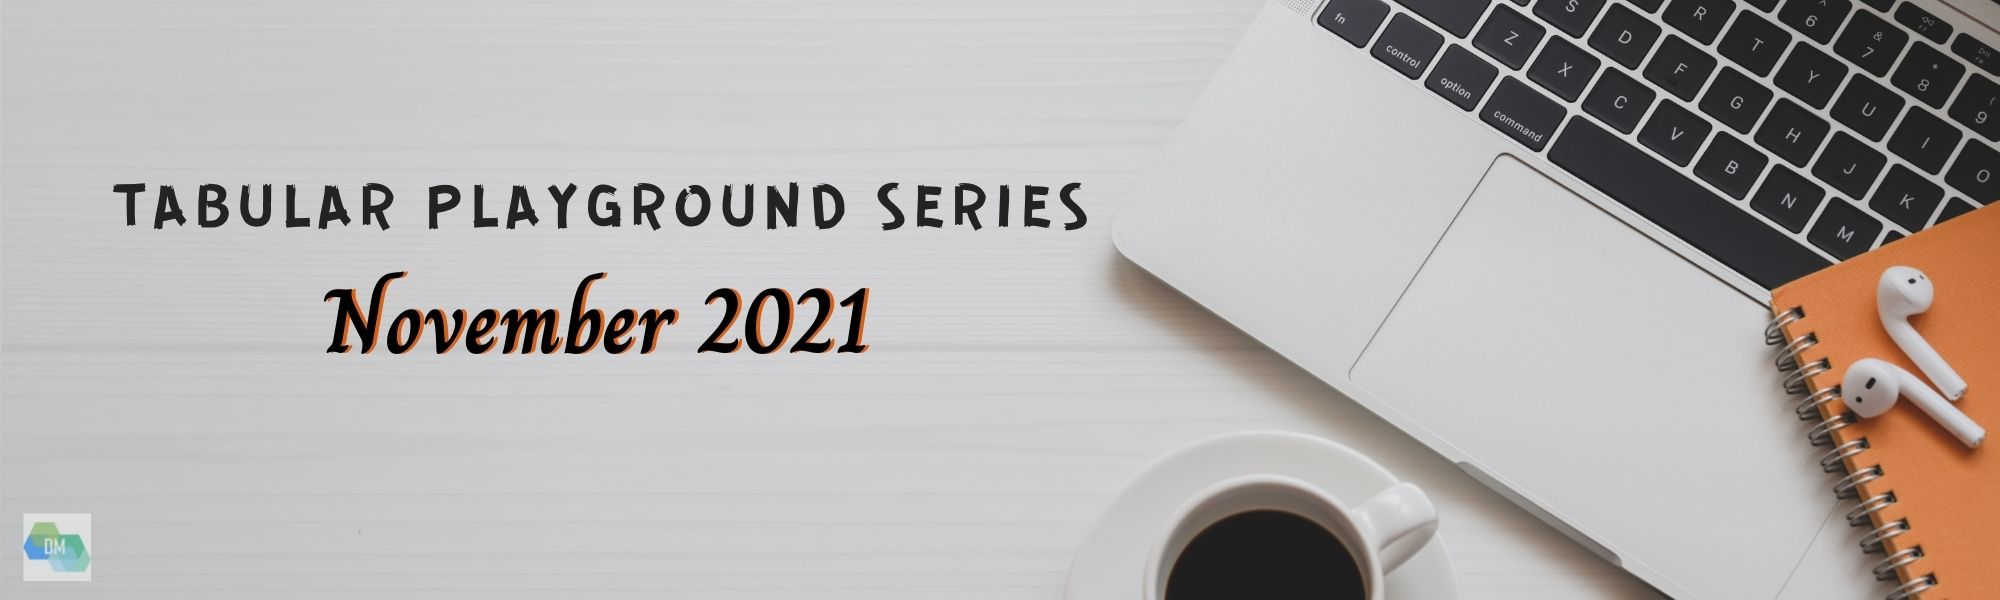

**Observations on this TPS:**
- `target` column is the target variable
- `Train` dataset has `600,000` rows and `102` columns which contains`100` features (f0-f99), `1` target variable `target` and `1` column of `id`
- `Test` dataset has `540,000` rows and `101` columns which contains`100` features (f0-f99) and `1` column of `id`
`target` and `1` column of `id`
- No missing values in train and test dataset


<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datatable as dt

import warnings
warnings.filterwarnings('ignore')

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_train = dt.fread("../input/tabular-playground-series-nov-2021/train.csv").to_pandas()
df_test = dt.fread("../input/tabular-playground-series-nov-2021/test.csv").to_pandas()
df_subm = dt.fread("../input/tabular-playground-series-nov-2021/sample_submission.csv").to_pandas()

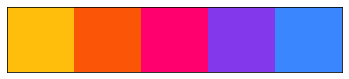

In [3]:
#Custom Color Palette 🎨
custom_colors = ["#ffbe0b","#fb5607","#ff006e","#8338ec","#3a86ff"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))
sns.palplot(sns.color_palette(custom_colors),size = 1.2)
plt.tick_params(axis ='both', labelsize=0, length = 0)

In [4]:
df_train_row_count, df_train_column_count = df_train.shape
print('Total number of rows:', df_train_row_count)
print('Total number of columns:', df_train_column_count)

Total number of rows: 600000
Total number of columns: 102


In [5]:
df_test_row_count, df_test_column_count = df_test.shape
print('Total number of rows:', df_test_row_count)
print('Total number of columns:', df_test_column_count)

Total number of rows: 540000
Total number of columns: 101


In [6]:
df_train.head()

,id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f91,f92,f93,f94,f95,f96,f97,f98,f99,target
0,0,0.106643,3.59437,132.8040,3.18428,0.081971,1.18859,3.73238,2.266270,2.09959,...,1.09862,0.013331,-0.011715,0.052759,0.065400,4.211250,1.97877,0.085974,0.240496,False
1,1,0.125021,1.67336,76.5336,3.37825,0.099400,5.09366,1.27562,-0.471318,4.54594,...,3.46017,0.017054,0.124863,0.154064,0.606848,-0.267928,2.57786,-0.020877,0.024719,False
2,2,0.036330,1.49747,233.5460,2.19435,0.026914,3.12694,5.05687,3.849460,1.80187,...,4.88300,0.085222,0.032396,0.116092,-0.001688,-0.520069,2.14112,0.124464,0.148209,False
3,3,-0.014077,0.24600,779.9670,1.89064,0.006948,1.53112,2.69800,4.517330,4.50332,...,3.47439,-0.017103,-0.008100,0.062013,0.041193,0.511657,1.96860,0.040017,0.044873,False
4,4,-0.003259,3.71542,156.1280,2.14772,0.018284,2.09859,4.15492,-0.038236,3.37145,...,1.91059,-0.042943,0.105616,0.125072,0.037509,1.043790,1.07481,-0.012819,0.072798,True


In [7]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,600000.0,299999.500000,173205.225094,0.00000,149999.750000,299999.500000,449999.250000,599999.00000
f0,600000.0,0.306508,0.522450,-3.79745,0.026222,0.097788,0.397184,8.78150
f1,600000.0,2.497590,1.554018,-1.22396,1.186238,2.516500,3.787630,6.22672
f2,600000.0,306.644536,551.743893,-1842.53000,43.573400,133.626000,302.262250,6119.28000
f3,600000.0,2.647901,1.544529,-1.36856,1.442028,2.634130,3.907640,6.52115
...,...,...,...,...,...,...,...,...
f95,600000.0,0.106419,0.209128,-1.27654,0.025461,0.062151,0.102016,3.65722
f96,600000.0,2.547853,1.558427,-1.58474,1.247888,2.601940,3.820665,6.25436
f97,600000.0,2.590159,1.525091,-1.25473,1.348078,2.682090,3.839520,6.14530
f98,600000.0,0.158881,0.436190,-3.99350,0.013536,0.058058,0.110718,10.76700


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Columns: 102 entries, id to target
dtypes: bool(1), float64(100), int32(1)
memory usage: 460.6 MB


In [9]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,540000.0,869999.500000,155884.717018,600000.00000,734999.750000,869999.500000,1.004999e+06,1.139999e+06
f0,540000.0,0.348663,0.566251,-3.62865,0.043555,0.115868,4.579395e-01,8.666950e+00
f1,540000.0,2.618251,1.543507,-1.26015,1.326280,2.657140,3.884850e+00,6.434070e+00
f2,540000.0,263.577730,496.444309,-1764.16000,27.361175,115.631000,2.454462e+02,6.098190e+03
f3,540000.0,2.583735,1.529646,-1.37056,1.408300,2.547380,3.812990e+00,6.275570e+00
...,...,...,...,...,...,...,...,...
f95,540000.0,0.092847,0.191741,-1.90749,0.020370,0.056317,9.505752e-02,4.097870e+00
f96,540000.0,2.442579,1.567684,-1.93905,1.117510,2.458465,3.737155e+00,6.210380e+00
f97,540000.0,2.640276,1.537125,-1.23205,1.385690,2.740695,3.903460e+00,6.421930e+00
f98,540000.0,0.158335,0.430856,-4.53793,0.018050,0.063792,1.155880e-01,1.077700e+01


<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Checking for missing values ✏️ </centre></strong></h3>

In [10]:
df_train.isna().sum()

id        0
f0        0
f1        0
f2        0
f3        0
         ..
f96       0
f97       0
f98       0
f99       0
target    0
Length: 102, dtype: int64

In [11]:
df_test.isna().sum()

id     0
f0     0
f1     0
f2     0
f3     0
      ..
f95    0
f96    0
f97    0
f98    0
f99    0
Length: 101, dtype: int64

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 18px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">There are no missing values.</p>

In [12]:
print ("Unique values are:\n",df_train.nunique())

Unique values are:
 id        600000
f0        516483
f1        409963
f2        485459
f3        398271
           ...  
f96       407424
f97       399620
f98       505994
f99       499969
target         2
Length: 102, dtype: int64


In [13]:
df_train.target.value_counts()

True     303606
False    296394
Name: target, dtype: int64

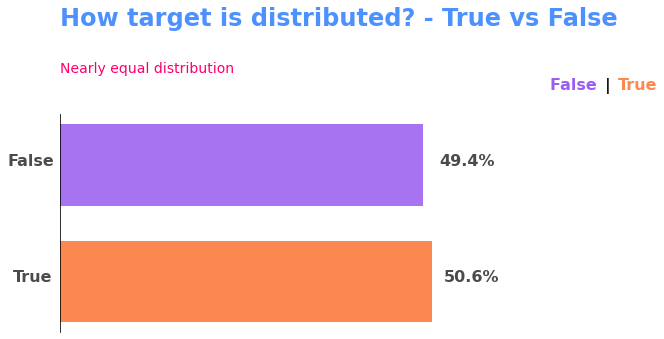

In [14]:
x = df_train['target'].value_counts()

fig,ax = plt.subplots(figsize = (7,4))
ax.barh([1],x.values[1], height = 0.7, color ='#8338ec',alpha = 0.7)
plt.text(-43000,1, 'False', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)
plt.text(310000,1, '49.4%', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'},alpha = 0.7)

ax.barh([0],x.values[0], height = 0.7, color ='#fb5607',alpha = 0.7)
plt.text(-38000,0,'True',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(313000,0, '50.6%',{'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)


plt.text(-50,2.2, 'How target is distributed? - True vs False',{'font': 'Trebuchet MS','weight':'bold','Size': '24','style':'normal', 'color':'#3a86ff'}, alpha = 0.9)
plt.text(400000,1.65, 'False ', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#8338ec'},alpha = 0.8)
plt.text(445000,1.65, '|', {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.9)
plt.text(455000,1.65, 'True',  {'font': 'Trebuchet MS','weight':'bold','Size': '16','style':'normal', 'color':'#fb5607'},alpha = 0.7)
plt.text(-50,1.8, 'Nearly equal distribution',{'font': 'Trebuchet MS','Size': '14','style':'normal', 'color':'#ff006e'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

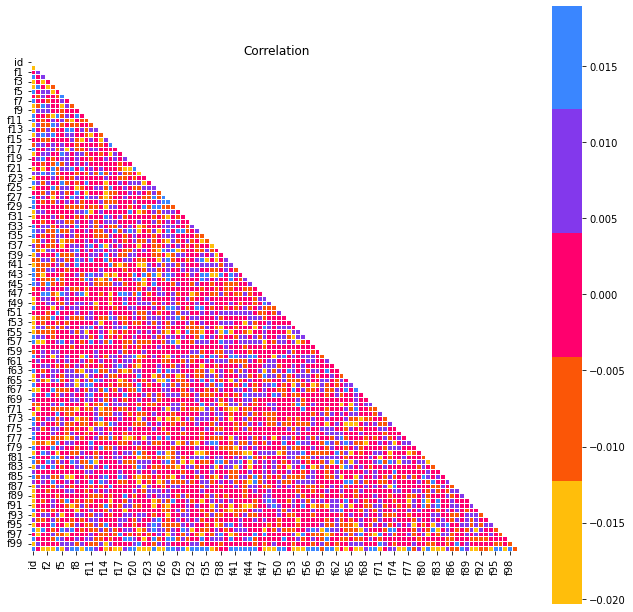

In [15]:
plt.figure(figsize = (11,11))
corr = df_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=custom_colors, robust=True, center=0,square=True, linewidths =.6)
plt.title('Correlation')
plt.show()

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 16px; font-weight: bold; letter-spacing: 2px; text-align: center; color:#3a0ca3;">All the features are  weakly correlated.</p>
  

Text(0.5, 1.0, 'Features correlation')

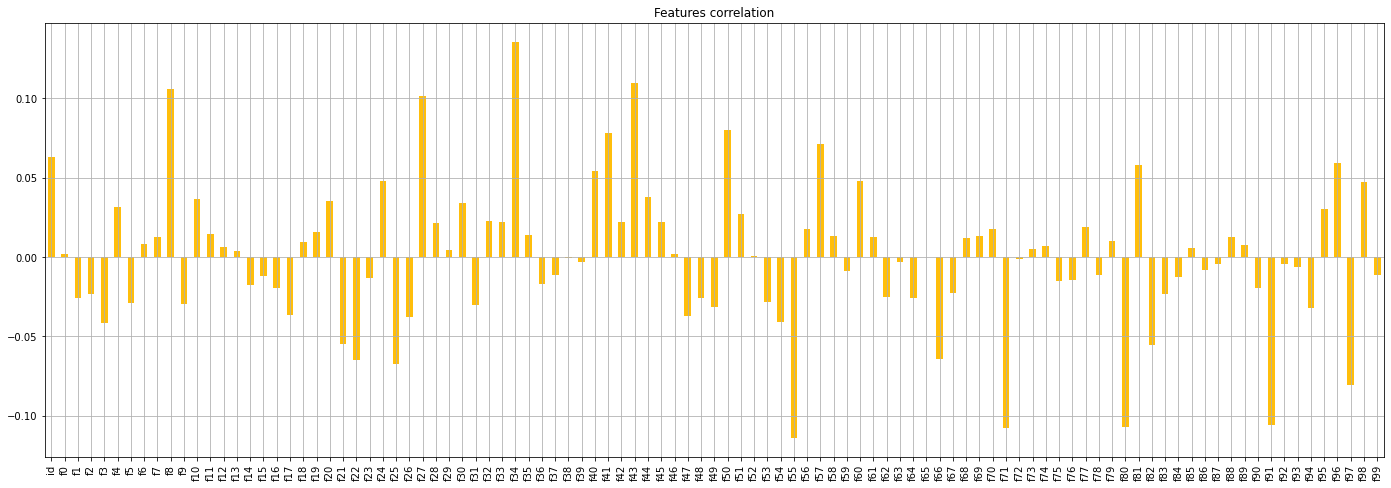

In [16]:
corr_loss = df_train.corr()
plt.figure(figsize=(24,8))
corr_loss["target"][:-1].plot(kind="bar",grid=True)
plt.title("Features correlation")

<p style="font-family: Trebuchet MS; line-height: 2; font-size: 20px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #3a0ca3">Features Distribution</p>

Distribution of all features (f0-f99) that are available in train and test dataset are shown below. Because there are 100 features (f0-f99), 20 features are represented in each sections.`Blue` represents train dataset while `yellow` represents test dataset

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f0 - f19) </centre></strong></h3>

<Figure size 432x288 with 0 Axes>

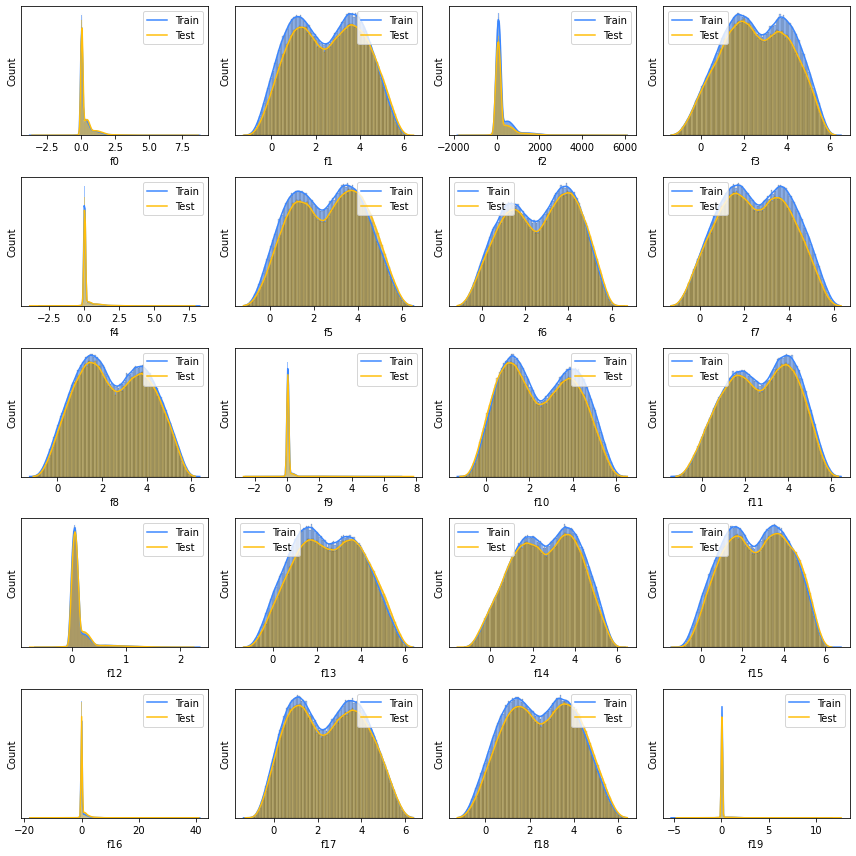

In [17]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[0:20]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f20 - f39) </centre></strong></h3>

<Figure size 432x288 with 0 Axes>

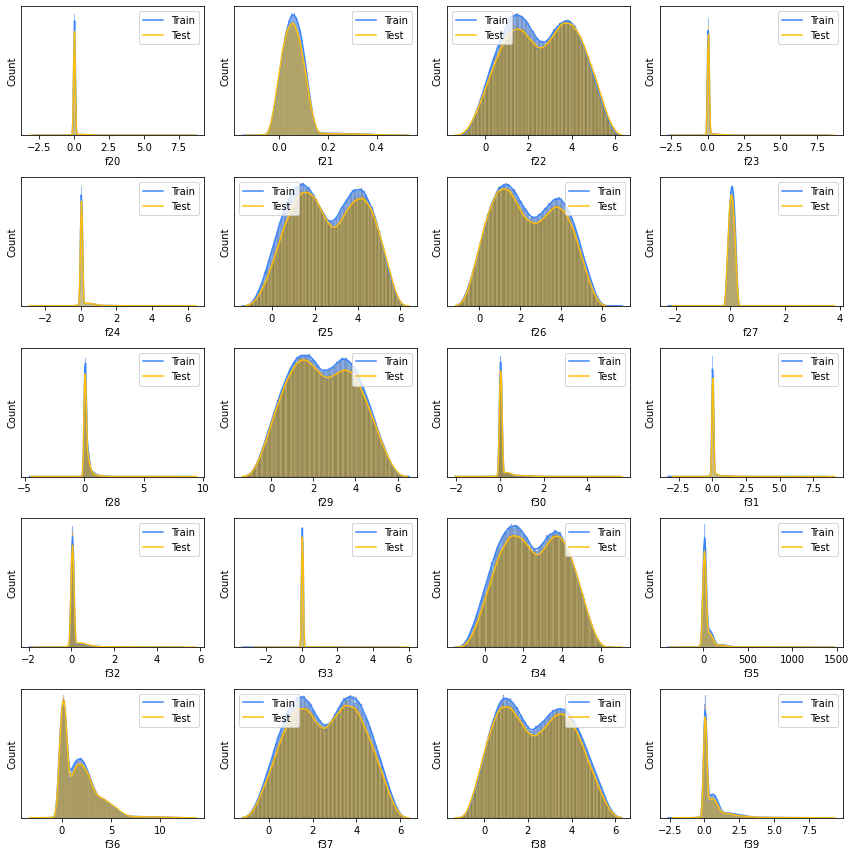

In [18]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[20:40]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f40 - f59) </centre></strong></h3>

<Figure size 432x288 with 0 Axes>

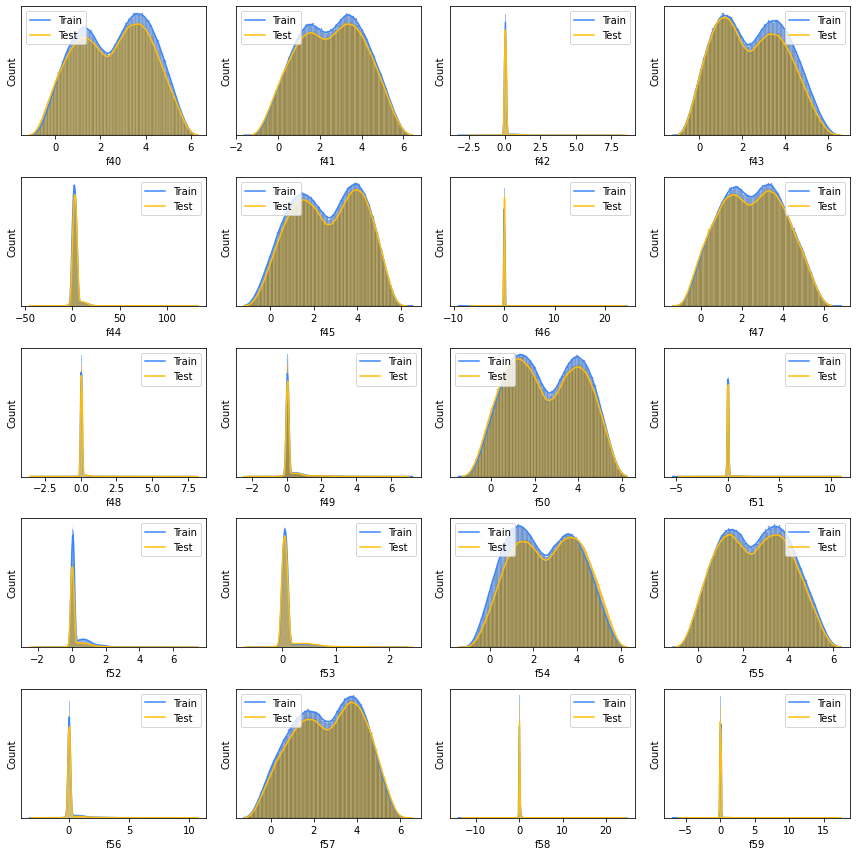

In [19]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[40:60]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f60 - f79) </centre></strong></h3>

<Figure size 432x288 with 0 Axes>

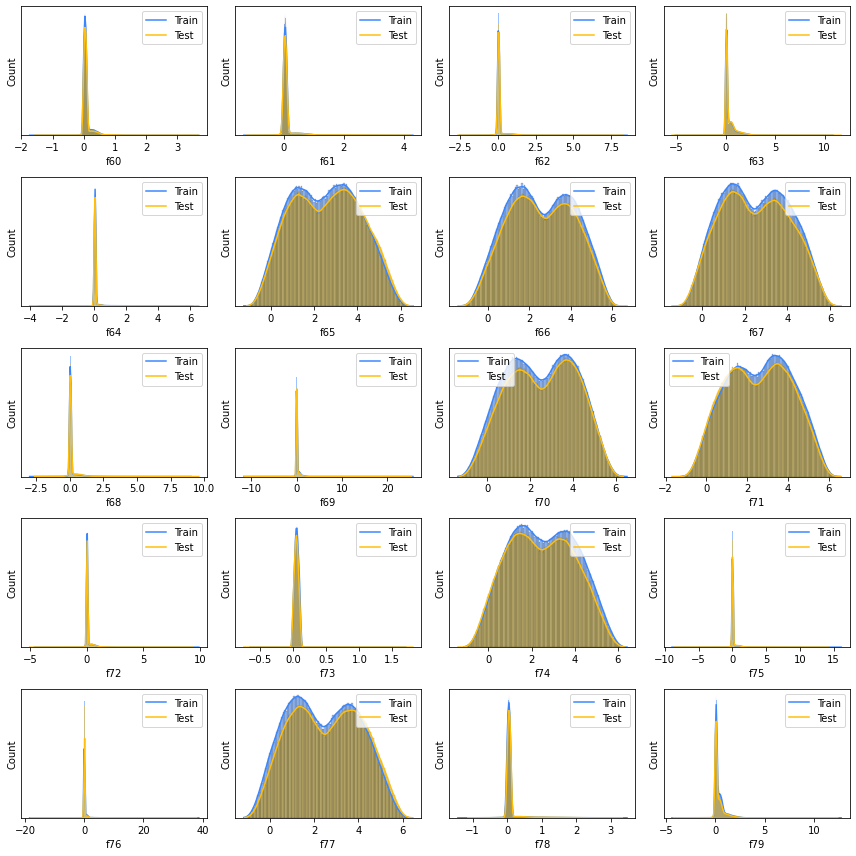

In [20]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[60:80]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>Features (f80 - f99) </centre></strong></h3>

<Figure size 432x288 with 0 Axes>

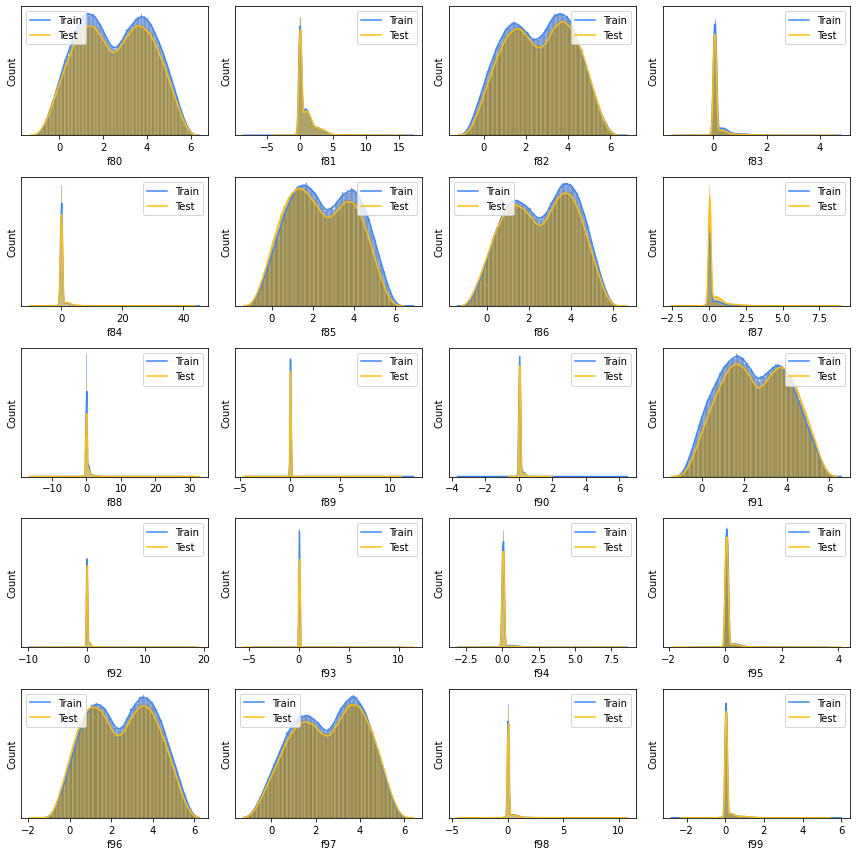

In [21]:
cols = ['f'+str(i) for i in range(100)]
i = 1
plt.figure()
fig, ax = plt.subplots(5, 4,figsize=(12, 12))
for feature in cols[80:100]:
    plt.subplot(5, 4,i)
    sns.histplot(df_train[feature],color="#3a86ff", kde=True, edgecolor="black")
    sns.histplot(df_test[feature],color="#ffbe0b", kde=True, edgecolor="black")
    plt.yticks([])
    plt.legend(labels=('Train','Test'))
    plt.tight_layout()
    i += 1
plt.show()

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>AutoGluon ⏳</centre></strong></h3>

In [22]:
pip install autogluon

     |████████████████████████████████| 352 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 273 kB 40.4 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 52 kB 1.0 MB/s  eta 0:00:01
     |████████████████████████████████| 4.2 MB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 206 kB 54.8 MB/s eta 0:00:01
     |████████████████████████████████| 27.4 MB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 119 kB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 61.2 MB/s eta 0:00:01
     |████████████████████████████████| 67.3 MB 16 kB/s s eta 0:00:01
     |████████████████████████████████| 166.7 MB 13 kB/s s eta 0:00:01
     |████████████████████████████████| 157 kB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 31.8 MB/s eta 0:00:01
     |████████████████████████████████| 90 kB 7.0 MB/s  eta 0:00:01
     |████████████████████████████

In [23]:
from autogluon.tabular import TabularDataset, TabularPredictor

In [24]:
time = 7200
pred = TabularPredictor(label ='target', eval_metric = 'roc_auc').fit(train_data = df_train, time_limit = time, presets ='best_quality', verbosity = 2)
result = pred.fit_summary()
result

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      LightGBMXT_BAG_L2   0.743754      40.284358  4475.867234               10.421463         986.255705            2       True          3
1    WeightedEnsemble_L3   0.743754      40.533492  4476.123286                0.249134           0.256053            3       True          4
2  KNeighborsUnif_BAG_L1   0.531172      29.862894  3489.611529               29.862894        3489.611529            1       True          1
3    WeightedEnsemble_L2   0.531172      30.039138  3489.798380                0.176243           0.186851            2       True          2
Number of models trained: 4
Types of models trained:
{'StackerEnsembleModel_LGB', 'WeightedEnsembleModel', 'StackerEnsembleModel_KNN'}
Bagging used: True  (with 10 folds)
Multi-layer stack-ensembling used: True  (with 3 levels)


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 0.5311724853909361,
  'WeightedEnsemble_L2': 0.5311724853909361,
  'LightGBMXT_BAG_L2': 0.7437540419425924,
  'WeightedEnsemble_L3': 0.7437540419425924},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'KNeighborsUnif_BAG_L1': 'AutogluonModels/ag-20211114_105035/models/KNeighborsUnif_BAG_L1/',
  'WeightedEnsemble_L2': 'AutogluonModels/ag-20211114_105035/models/WeightedEnsemble_L2/',
  'LightGBMXT_BAG_L2': 'AutogluonModels/ag-20211114_105035/models/LightGBMXT_BAG_L2/',
  'WeightedEnsemble_L3': 'AutogluonModels/ag-20211114_105035/models/WeightedEnsemble_L3/'},
 'model_fit_times': {'KNeighborsUnif_BAG_L1': 3489.611528635025,
  'WeightedEnsemble_L2': 0.18685102462768555,
  'LightGBMXT_BAG_L2': 986.2557048797607,
  'We

In [25]:
y_pred = pred.predict_proba(df_test)
df_subm['target'] = y_pred.iloc[:, -1].values
df_subm.to_csv("submission_autogluon.csv", index=False)
df_subm

,id,target
0,600000,0.670099
1,600001,0.659861
2,600002,0.823275
3,600003,0.520167
4,600004,0.473733
...,...,...
539995,1139995,0.612538
539996,1139996,0.685279
539997,1139997,0.491123
539998,1139998,0.622182


<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>H2O ⏳</centre></strong></h3>

In [26]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.11" 2021-04-20; OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04); OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpchlx4kp2
  JVM stdout: /tmp/tmpchlx4kp2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpchlx4kp2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.3
H2O_cluster_version_age:,1 month and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_oq2gwv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [27]:
train = df_train.drop('id',axis=1)
test = df_test.drop('id',axis=1)

train = h2o.H2OFrame(train)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [28]:
x = train.columns
y = "target"
x.remove(y)

aml = H2OAutoML(max_models = 30, nfolds = 5, seed = 1,max_runtime_secs = 1600)
aml.train(x = x, y = y, training_frame = train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_1_20211114_125630


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.02225 ),"nlambda = 30, lambda.max = 6.763, lambda.min = 0.02225, lambda.1se...",100,100,26,AutoML_1_20211114_125630_training_Key_Frame__upload_9096cc13fd0575...




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.20740735390041165
RMSE: 0.45541997529797884
LogLoss: 0.6071531942666619
Null degrees of freedom: 599999
Residual degrees of freedom: 599899
Null deviance: 831689.9263443397
Residual deviance: 728583.8331199944
AIC: 728785.8331199944
AUC: 0.7492401908224661
AUCPR: 0.7155517476780867
Gini: 0.49848038164493214

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.491237543920006: 


,,False,True,Error,Rate
0,False,209292.0,87102.0,0.2939,(87102.0/296394.0)
1,True,71623.0,231983.0,0.2359,(71623.0/303606.0)
2,Total,280915.0,319085.0,0.2645,(158725.0/600000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.491238,0.745098,207.0
1,max f2,0.032879,0.836646,399.0
2,max f0point5,0.508895,0.740980,197.0
3,max accuracy,0.502489,0.737792,201.0
4,max precision,0.976889,0.824427,1.0
5,max recall,0.032879,1.000000,399.0
6,max specificity,0.990418,0.999956,0.0
7,max absolute_mcc,0.502489,0.475470,201.0
8,max min_per_class_accuracy,0.506972,0.736224,198.0
9,max mean_per_class_accuracy,0.502489,0.737698,201.0



Gains/Lift Table: Avg response rate: 50.60 %, avg score: 50.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.881587,1.506558,1.506558,0.762333,0.908890,0.762333,0.908890,0.015066,0.015066,50.655784,50.655784,0.010254
1,2,0.02,0.854812,1.504252,1.505405,0.761167,0.867211,0.761750,0.888051,0.015043,0.030108,50.425222,50.540503,0.020462
2,3,0.03,0.835544,1.500958,1.503923,0.759500,0.844817,0.761000,0.873639,0.015010,0.045118,50.095848,50.392285,0.030603
3,4,0.04,0.819565,1.509522,1.505323,0.763833,0.827333,0.761708,0.862063,0.015095,0.060213,50.952221,50.532269,0.040918
4,5,0.05,0.805906,1.486137,1.501485,0.752000,0.812702,0.759767,0.852191,0.014861,0.075074,48.613664,50.148548,0.050759
5,6,0.10,0.752713,1.487191,1.494338,0.752533,0.777783,0.756150,0.814987,0.074360,0.149434,48.719064,49.433806,0.100070
6,7,0.15,0.712240,1.474543,1.487740,0.746133,0.731908,0.752811,0.787294,0.073727,0.223161,47.454266,48.773959,0.148102
7,8,0.20,0.677747,1.478890,1.485527,0.748333,0.694737,0.751692,0.764154,0.073945,0.297105,47.889040,48.552730,0.196574
8,9,0.30,0.616680,1.481921,1.484325,0.749867,0.646603,0.751083,0.724971,0.148192,0.445298,48.192065,48.432508,0.294130
9,10,0.40,0.560775,1.474180,1.481789,0.745950,0.588530,0.749800,0.690861,0.147418,0.592716,47.418035,48.178890,0.390120




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.2077643044807794
RMSE: 0.4558116984904835
LogLoss: 0.6076985714524649
Null degrees of freedom: 599999
Residual degrees of freedom: 599899
Null deviance: 831691.9091934648
Residual deviance: 729238.2857429578
AIC: 729440.2857429578
AUC: 0.749007622632032
AUCPR: 0.7153052602272522
Gini: 0.49801524526406404

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.49138018030992875: 


,,False,True,Error,Rate
0,False,209179.0,87215.0,0.2943,(87215.0/296394.0)
1,True,71634.0,231972.0,0.2359,(71634.0/303606.0)
2,Total,280813.0,319187.0,0.2647,(158849.0/600000.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.491380,0.744941,207.0
1,max f2,0.031881,0.836646,399.0
2,max f0point5,0.507935,0.740577,197.0
3,max accuracy,0.500833,0.737503,201.0
4,max precision,0.975899,0.816667,1.0
5,max recall,0.031881,1.000000,399.0
6,max specificity,0.990528,0.999963,0.0
7,max absolute_mcc,0.500833,0.474891,201.0
8,max min_per_class_accuracy,0.506225,0.736351,198.0
9,max mean_per_class_accuracy,0.500833,0.737369,201.0



Gains/Lift Table: Avg response rate: 50.60 %, avg score: 50.60 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.01,0.876352,1.506558,1.506558,0.762333,0.904286,0.762333,0.904286,0.015066,0.015066,50.655784,50.655784,0.010254
1,2,0.02,0.849425,1.502605,1.504582,0.760333,0.861905,0.761333,0.883096,0.015026,0.030092,50.260535,50.458160,0.020429
2,3,0.03,0.830222,1.503264,1.504142,0.760667,0.839404,0.761111,0.868532,0.015033,0.045124,50.326410,50.414243,0.030617
3,4,0.04,0.814047,1.506887,1.504829,0.762500,0.821880,0.761458,0.856869,0.015069,0.060193,50.688722,50.482863,0.040878
4,5,0.05,0.800514,1.487125,1.501288,0.752500,0.807274,0.759667,0.846950,0.014871,0.075064,48.712476,50.128785,0.050739
5,6,0.10,0.747659,1.486598,1.493943,0.752233,0.772528,0.755950,0.809739,0.074330,0.149394,48.659776,49.394281,0.099990
6,7,0.15,0.707785,1.473950,1.487278,0.745833,0.727146,0.752578,0.782208,0.073697,0.223092,47.394979,48.727847,0.147962
7,8,0.20,0.673840,1.477046,1.484720,0.747400,0.690513,0.751283,0.759284,0.073852,0.296944,47.704591,48.472033,0.196247
8,9,0.30,0.614048,1.482283,1.483908,0.750050,0.643327,0.750872,0.720632,0.148228,0.445172,48.228296,48.390787,0.293877
9,10,0.40,0.559362,1.474543,1.481567,0.746133,0.586512,0.749687,0.687102,0.147454,0.592627,47.454266,48.156657,0.389940




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.735175,0.001191,0.735200,0.735642,0.733275,0.735225,0.736533
1,auc,0.749010,0.001454,0.748792,0.750790,0.746840,0.749729,0.748897
2,err,0.264825,0.001191,0.264800,0.264358,0.266725,0.264775,0.263467
3,err_count,31779.000000,142.945800,31776.000000,31723.000000,32007.000000,31773.000000,31616.000000
4,f0point5,0.733831,0.000900,0.734036,0.734023,0.732885,0.733076,0.735134
5,f1,0.744899,0.000825,0.745764,0.744994,0.744036,0.744070,0.745631
6,f2,0.756306,0.000986,0.757871,0.756298,0.755532,0.755398,0.756433
7,lift_top_group,1.506570,0.026760,1.504217,1.553148,1.488422,1.490367,1.496695
8,logloss,0.607170,0.001361,0.606997,0.605602,0.609281,0.606542,0.607426
9,max_per_class_error,0.294468,0.002662,0.296632,0.293366,0.297801,0.293184,0.291356



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-11-14 13:11:52,0.000 sec,2,.68E1,101,1.372824,1.375356,0.000016,0.0,NaN,,,,,,,
1,,2021-11-14 13:11:58,5.872 sec,4,.42E1,101,1.365509,1.369312,0.000023,0.0,4.0,0.494779,0.682754,0.020632,0.748378,0.714898,1.511828,0.267518
2,,2021-11-14 13:12:05,13.170 sec,6,.26E1,101,1.354854,1.360346,0.000043,0.0,NaN,,,,,,,
3,,2021-11-14 13:12:11,19.132 sec,8,.16E1,101,1.340109,1.347595,0.000077,0.0,NaN,,,,,,,
4,,2021-11-14 13:12:17,25.399 sec,10,.1E1,101,1.321159,1.330587,0.000129,0.0,NaN,,,,,,,
5,,2021-11-14 13:12:23,31.353 sec,12,.62E0,101,1.299042,1.309754,0.000202,0.0,NaN,,,,,,,
6,,2021-11-14 13:12:29,37.342 sec,14,.39E0,101,1.276142,1.286902,0.000298,0.0,14.0,0.472059,0.638071,0.108511,0.748918,0.715294,1.508205,0.266152
7,,2021-11-14 13:12:36,44.487 sec,16,.24E0,101,1.255333,1.264810,0.000413,0.0,NaN,,,,,,,
8,,2021-11-14 13:12:42,50.411 sec,18,.15E0,101,1.238803,1.246132,0.000540,0.0,NaN,,,,,,,
9,,2021-11-14 13:12:49,56.815 sec,20,.93E-1,101,1.227283,1.232314,0.000669,0.0,NaN,,,,,,,



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,f34,0.238256,1.000000,0.042598
1,f55,0.212279,0.890974,0.037953
2,f8,0.199088,0.835607,0.035595
3,f91,0.192580,0.808290,0.034431
4,f43,0.192462,0.807796,0.034410
5,f71,0.186336,0.782084,0.033315
6,f80,0.184340,0.773705,0.032958
7,f27,0.180381,0.757091,0.032250
8,f50,0.145888,0.612316,0.026083
9,f41,0.143741,0.603306,0.025699



See the whole table with table.as_data_frame()


In [29]:
lb = aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_1_20211114_125630,0.749008,0.607699,0.715305,0.265099,0.455812,0.207764
StackedEnsemble_BestOfFamily_1_AutoML_1_20211114_125630,0.748666,0.606325,0.715045,0.268859,0.454369,0.206451
GBM_1_AutoML_1_20211114_125630,0.691076,0.654972,0.669994,0.394806,0.480795,0.231164
XGBoost_1_AutoML_1_20211114_125630,0.668289,0.65304,0.651373,0.42197,0.479426,0.229849
XGBoost_2_AutoML_1_20211114_125630,0.630449,0.675868,0.611344,0.471755,0.491326,0.241401


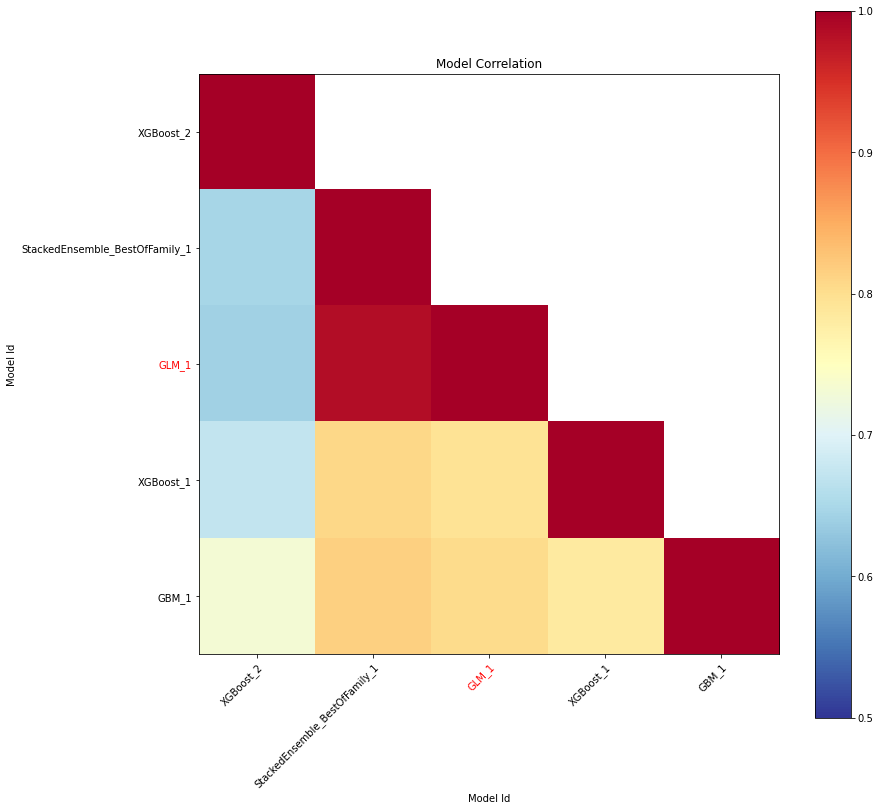

In [30]:
model_plot = aml.model_correlation_heatmap(train)

In [31]:
pred_1 = aml.leader.predict(test).as_data_frame()['True']

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [32]:
df_subm['target'] = pred_1

In [33]:
df_subm.to_csv('submission_h2o.csv', index=False)

<h3 style="font-family: Trebuchet MS;background-color:#eae4e9;color:#3a0ca3;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;letter-spacing: 2px;"><strong><centre>If you found this notebook useful, please Upvote. Thanks!</centre></strong></h3>